**A lekérdezés megmutatja hogy mennyiségi egységenként hány db van készleten, és hágyszor vitték fel adatot az adott mennyiségben.**

In [32]:
select MEGYS, count(*) as 'max_fel', sum(KESZLET) as 'KESZLETEN' from termek group by MEGYS order by count(*) desc

(6 rows affected)

Total execution time: 00:00:00.013

MEGYS,max_fel,KESZLETEN
db,483,815131
csomag,44,35050
ív,21,15300
tekercs,1,8000
üveg,1,300
doboz,1,100


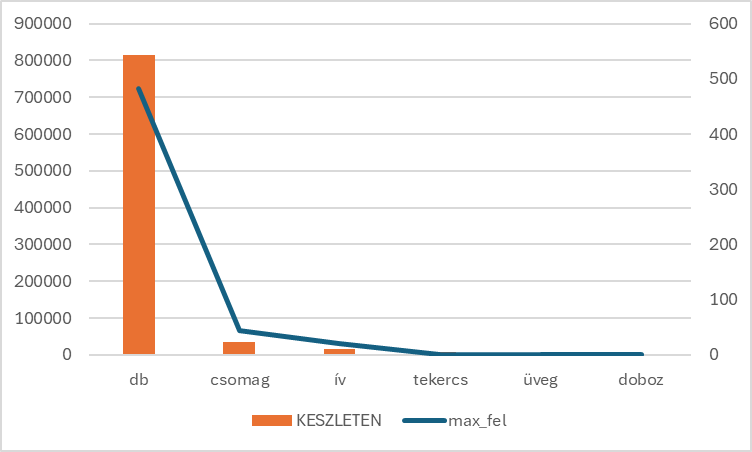

A legtöbb adatot db - mennyiségi egységben vitték fel, és igy van tárolva a legöbb mennyiség is

<span style="color: var(--vscode-foreground);"><b>A lekérdezés megmutatja a listaár minimumát, maximumát, átlagát, a szórását, darabszámát, és az egyedi értékek számát</b></span>

In [34]:
SELECT 
    MIN(LISTAAR) AS minimum,
    MAX(LISTAAR) AS maximum,
    AVG(LISTAAR) AS atlag,
    SQRT(
        AVG(LISTAAR * LISTAAR) - AVG(LISTAAR) * AVG(LISTAAR)
    ) AS szoras,
    COUNT(LISTAAR) AS elemszam,
    COUNT(DISTINCT LISTAAR) AS egyedi_elemek_szama
FROM Termek;

(1 row affected)

Total execution time: 00:00:00.096

minimum,maximum,atlag,szoras,elemszam,egyedi_elemek_szama
0,46000,786.2813067150635,3599.2106392606024,551,220


A lekérdezésből kiderül hogy a listaar minimuma 0, maximuma 46000, az átlaga: 786.28, a szórása 3599.21. 

Összesen 551 db listaar van és ebből 220 különböző érték van megadva a táblában

**A lekérdezés megmutatja hogy mennyi null érték van a leírás oszlopban.**

In [6]:
SELECT row_type,
       COUNT(*) AS row_count,
       ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM 
    (SELECT 
        CASE 
            WHEN LEIRAS IS NULL THEN 'Null'
            ELSE 'Non Empty' 
        END AS row_type
     FROM Termek) rows
GROUP BY row_type;

(2 rows affected)

Total execution time: 00:00:00.030

row_type,row_count,percentage
Non Empty,24,4.360000000000
Null,527,95.640000000000


A leirás oszlop kitöltöttségi szintje nem magas hiszen alig 4% -a kitöltve a rekordoknak.

**A lekérdezés megmutatja, hogy bizonyos kategóriáknak mennyi terméke van, és ez hány százalékát teszi ki az egész táblának. Csak a 10 legtöbb darabszámmal rendelkezőt jeleníti meg**

In [8]:
SELECT top 10
    TK.KAT_NEV,
    COUNT(*) AS darabszam,
    ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Termek)), 2) AS szazalek
FROM Termek T join Termekkategoria TK ON T.KAT_ID = TK.KAT_ID 
GROUP BY TK.KAT_NEV
ORDER BY darabszam DESC;

(10 rows affected)

Total execution time: 00:00:00.024

KAT_NEV,darabszam,szazalek
golyóstoll,26,4.720000000000
iskolaszer,24,4.360000000000
ajándék tasak,20,3.630000000000
ceruza,19,3.450000000000
tollbetét,18,3.270000000000
képeslap,16,2.900000000000
könyv,15,2.720000000000
filctoll,13,2.360000000000
füzet,11,2.000000000000
matrica,10,1.810000000000


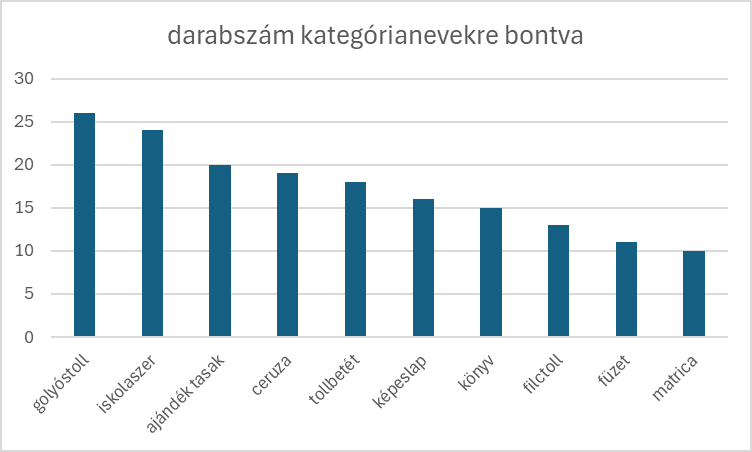

<u>A lekérdezésből látszódik hogy a golyóstollból van a legtöbb</u>

**A lekérdezés megmutatja hogy hágy db és milyen hosszú szövegek vannak a megnevezések oszlopban**

In [5]:
SELECT LEN(MEGNEVEZES) AS string_length,
       count(*) AS row_count
FROM Termek
GROUP BY LEN(MEGNEVEZES)
ORDER BY 1

(33 rows affected)

Total execution time: 00:00:00.022

string_length,row_count
3,2
5,2
6,1
7,2
8,5
9,8
10,15
11,18
12,23
13,30


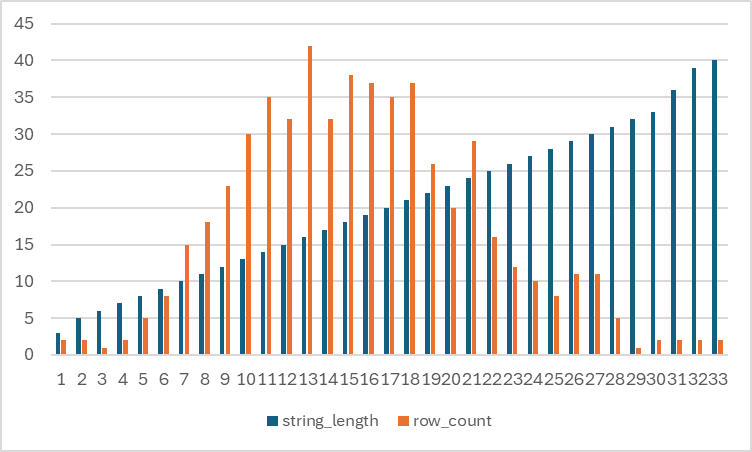

ahogy látszódik is a diagromból 1 től egészen 33 hosszúságú karakterláncok is vannak a Megnevezés oszlopban. Jól látszik a haranggörbe eloszlás amely megmutatja hogy a közepes hosszúságú szövegekből van a legtöbb.